# Quantitative Measures from ERP signals 

### This tutorial completes our discussion of extracting features from EEG experiments for building relationships with data. 

### We will come back to these EEG measurements when we learn about classifiers.  


## Target Detection Experiment 

### These data were extracted from the ERP CORE (https://osf.io/thsqg/wiki/home/).  

### These are data from the experiment, **Active Visual Oddball P3**

### Some details of the experiment - 
*   The stimulus consists of the letters A, B, C, D, E
*   In any block, one of the 5 letters was designated the "target" with a response with one hand, while the others were designated "standards" with response with the other hand. 
*   The probability of any letter appearing is 0.2.  
*   The probability of a target appearing is 0.2 

#### Load modules that we need 

In [1]:
import numpy as np 
from matplotlib import pyplot as plt
from hdf5storage import loadmat, savemat 
from scipy.fftpack import fft
from scipy import signal  #THIS IS NEW!!! signal processng module 

In [2]:
data = loadmat('../Exercises/data/1_P3.mat')

In [3]:
blocktarget = data['blocktarget']
channelnames = data['channelnames']
eeg = data['eeg']
eeg_time = data['eeg_time']
goodtrials = data['goodtrials']
nchannels = data['nchannels']
ntrials = data['ntrials']
response = data['response']
responsetime = data['responsetime']
samplingrate = data['samplingrate']
stimulus = data['stimulus']
target = data['target']

In [4]:
#i like to work in microvolts
eeg = eeg*10**6

## README 

### The information about the datafiles in an experiment is normally placed in a README file. 
### For convenience I am going to place that information here instead.

###  This data was obtained from the archive ERP CORE and reorganized for this class. 
###  Each file contains the data of one participant, indicated in the filename. 
###  The variables contained here are 

*   `ntrials` - number of trials in the experiment 
*   `nchannels` - number of EEG channels 
*   `samplingrate` - number of samples of EEG in per second
*   `eeg` - eegdata of the experiment.  of dimensions, ntrials x nchannels x ntimepoints.  The EEG is provided in units of volts. 
*   `eeg_time` - the time relative to *stimulus onset* in each EEG observation.
*   `channelnames` - the name of the EEG channels indicating where it is located.    
*   `stimulus` - the stimulus presented on each good trial, 1 = A, 2 = B, 3 = C, 4 = D, 5 = E 
*   `target` - the target stimulus on each good trial 1 = A, 2 = B, 3 = C, 4 = D, 5 = E
*   `blocktarget` - indicates which trial had the target on each block, 1 if a target 0 if not a target. 
*   `response` - variable indicating the response accuracy 1 = correct, -1 = incorrect, 0 = no response,
*   `responsetime` - time after stimulus onset when the subject provided a response. 
*   `goodtrials` - vector with value 1 if the trial had a response, 0 if no response or multiple responses.   


#### Plot a single channel (Pz) over Parietal Cortex 

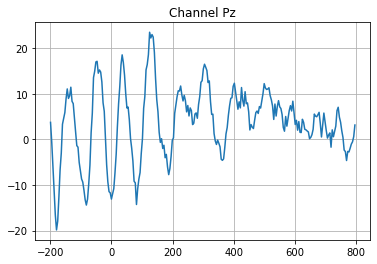

In [5]:
plt.plot(eeg_time,eeg[0,12,:])
plt.title('Channel '+channelnames[12])
plt.grid()
plt.show()

In [6]:
channel = 12 
trial = 0
epoch = np.squeeze(eeg[trial,channel,:])
T = 1  #duration of the time series 
deltaf = 1/T # frequency resolution 
nsamp = len(epoch)#number of samples 
nf = int(nsamp/2) #highest frequency is 1/2 
f = np.arange(0,nf)*deltaf #steps in frequency 
fft_epoch = fft(epoch) # take the fft, tell it to do it over the time dimension 
amplitude = 2*np.abs(fft_epoch)/nsamp/deltaf #compute amplitude in units of microvolts/hz 

#### Plot the amplitude spectrum of the one channel and one trial shown above 

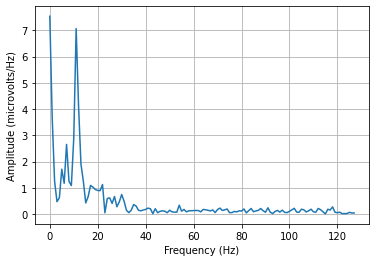

In [7]:
 
plt.plot(f[range(nf)],amplitude[range(nf)])
plt.grid()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (microvolts/Hz)')
plt.show()


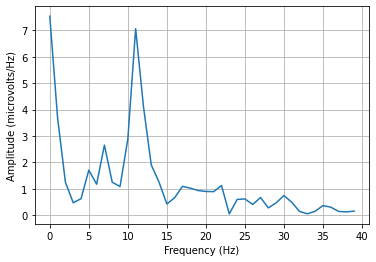

In [8]:
maxf = 40
maxbin = int(maxf/deltaf)
plt.plot(f[range(maxbin)],amplitude[range(maxbin)])
plt.grid()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (microvolts/Hz)')
plt.show()

# Spectrogram 

![SPEECH](img/spectrogram.png)

#### The spectrogram is an analysis that looks at the evolution of the amplitude spectrum over time.  
#### The spectrogram is widely used to understand speech and other sound signals.  
#### Here we will look at the `spectrogram` function in the scipy.signal module

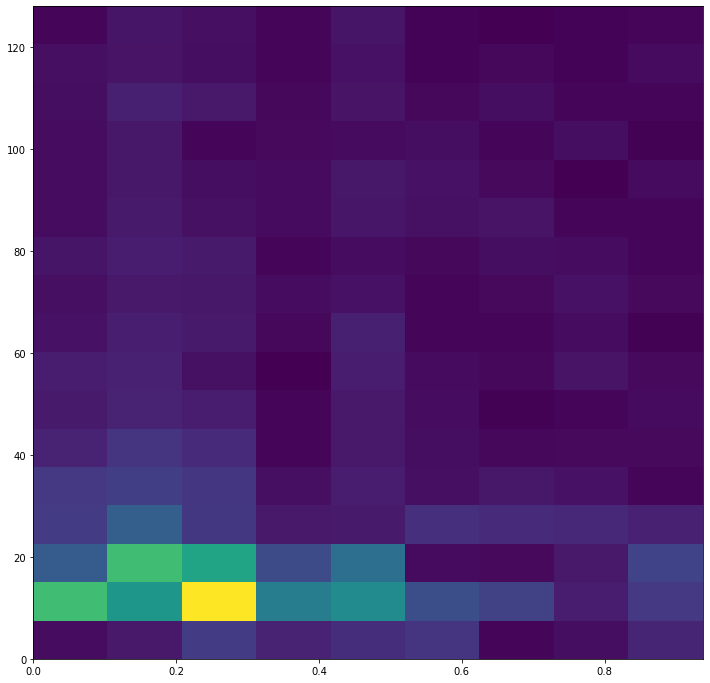

In [9]:
[f,t,amplitude_tf] = signal.spectrogram(epoch,fs = samplingrate,window = range(32), mode = 'magnitude')
# windown gives you the interbaal that you want to sample by 
plt.figure(figsize=(12,12))
plt.imshow(amplitude_tf,aspect = 'auto',origin='lower',extent = [0,t[8],0,f[16]])
plt.show()

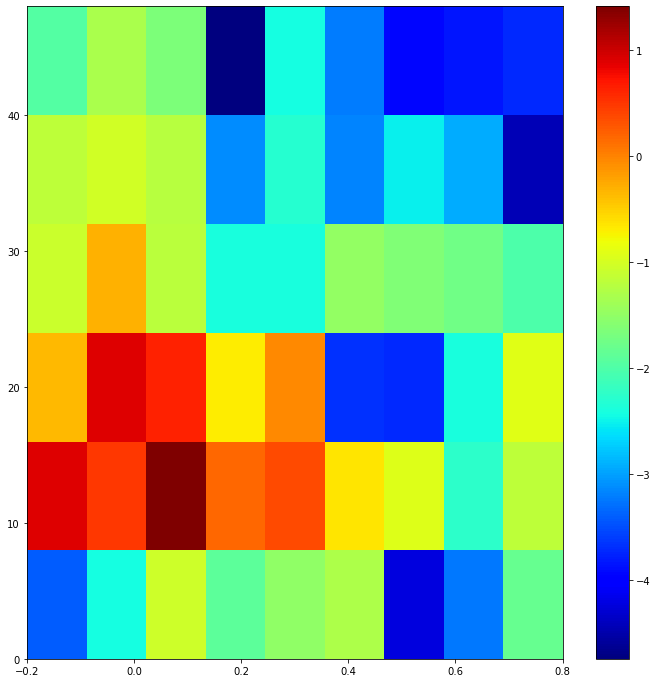

In [10]:
plt.figure(figsize=(12,12))
plt.imshow(np.log2(amplitude_tf[range(6),:]),aspect = 'auto',origin='lower',extent = [-0.2,0.8,0,f[6]],cmap = 'jet')
plt.colorbar()
plt.show()
# frequncy is the y axis

#### The plot above shows the evolution of the amplitude spectrum over the trial. 
#### I used a log 2 scale, so a difference of 1 means double.   

#### While the image plot is pretty, you can get a more quantitative feel by plotting how amplitude evolves over time 

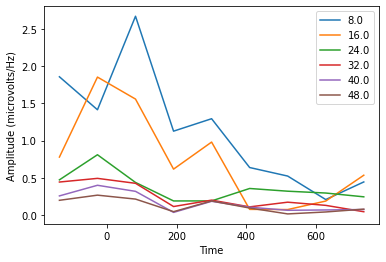

In [11]:
for j in range(1,7,1): 
    plt.plot(1000*t+eeg_time[0],amplitude_tf[j,:])
plt.xlabel('Time')
plt.ylabel('Amplitude (microvolts/Hz)')
plt.legend(f[1:7])
